# Search Algorithm Comparison using 8-Puzzle Problem
### Team Member: <br>
Pradipta Arya Daniswara (5025221185)<br>
Irfan Ridhana (5025221214)

In [123]:
import math
import matplotlib.pyplot as plt
from collections import namedtuple
from utils import Stack, Queue, PriorityQueue
from npuzzle import NPuzzleState

## 8-Puzzle Problem

<img src='imgs/8-Puzzle Problem.png' width='100%'>
<h4 align='center'>8-Puzzle Problem</h4>

The 8-puzzle problem is a sliding puzzle that consists of a 3x3 grid with 8 numbered tiles and one blank space. The objective is to rearrange the tiles from an initial configuration to a desired goal configuration by sliding the tiles into the empty space.

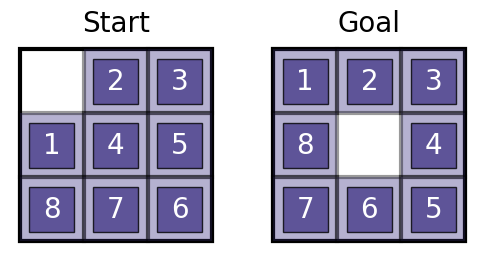

In [124]:
start_state_tiles = [
    0, 2, 3, 
    1, 4, 5, 
    8, 7, 6]

goal_state_tiles = [
    1, 2, 3, 
    8, 0, 4,
    7, 6, 5]

start_state = NPuzzleState(tiles=start_state_tiles)
goal_state = NPuzzleState(tiles=goal_state_tiles)

fig, axes = plt.subplots(1, 2, figsize=(6, 3))
start_state.plot(axes[0], 'Start')
goal_state.plot(axes[1], 'Goal')
plt.show()

## Uninformed Search Strategies

Uninformed search algorithms, also known as blind search algorithms, operate without any prior knowledge or heuristic information about the problem domain or the path to the solution. These algorithms treat the search space as a "black box" and explore it systematically without any specific guidance.

### BFS
Breadth-First Search (BFS) is an uninformed search algorithm used for traversing or searching a tree or graph data structure. It explores all the vertices at the current depth level before moving on to the vertices at the next depth level. BFS is guaranteed to find the shortest path between the start node and the goal node, provided that a solution exists.

Advantages of BFS:

1. Shortest Path: BFS guarantees to find the shortest path between the start node and the goal node, assuming that the solution exists and the cost of all edges is the same.
2. Complete: If a solution exists, BFS will find it as long as memory is not exhausted.
3. Optimal for Unweighted Graphs: In unweighted graphs, where all edges have the same cost, BFS finds the optimal solution.

Disadvantages of BFS:

1. Memory Requirements: BFS can be memory-intensive for large search spaces, as it needs to store all the nodes at the current depth level in memory.
2. Inefficient for Weighted Graphs: BFS does not consider edge weights, making it inefficient for finding the shortest path in weighted graphs.
3. Redundant Exploration: BFS may explore redundant paths, leading to unnecessary computations.

Steps in BFS:

1. Initialize an empty queue and an empty set to store explored nodes.
2. Push the start node into the queue.
3. While the queue is not empty:
    - Dequeue a node from the front of the queue.
    - If the dequeued node is the goal node, return the solution and the number of nodes generated.
    - Mark the dequeued node as explored.
    - Generate all successors (child nodes) of the dequeued node.
    - For each successor that has not been explored, enqueue it into the queue.
4. If the queue becomes empty and the goal node has not been found, return None, indicating no solution exists.

In [125]:
Node = namedtuple('Node', 'state parent action cost')

def solution(node):
    path = []
    while node.parent is not None:
        path = [(node.state, node.action)] + path
        node = node.parent
    return path

def BFS(start_state, goal_state):
    
    explored = set()
    
    frontier = Queue()
    frontier.push(Node(start_state, None, None, 0))    

    num_generated = 0
    
    while not frontier.is_empty():        
        node = frontier.pop()
        explored.add(node.state)

        if node.state == goal_state: 
            return solution(node), num_generated
        
        for successor, action, step_cost in node.state.successors():
            num_generated += 1
            if successor not in explored:
                frontier.push(Node(successor, node, action, node.cost + step_cost))
    
    return None, num_generated

Number of generated nodes: 242
Length of solution path: 6


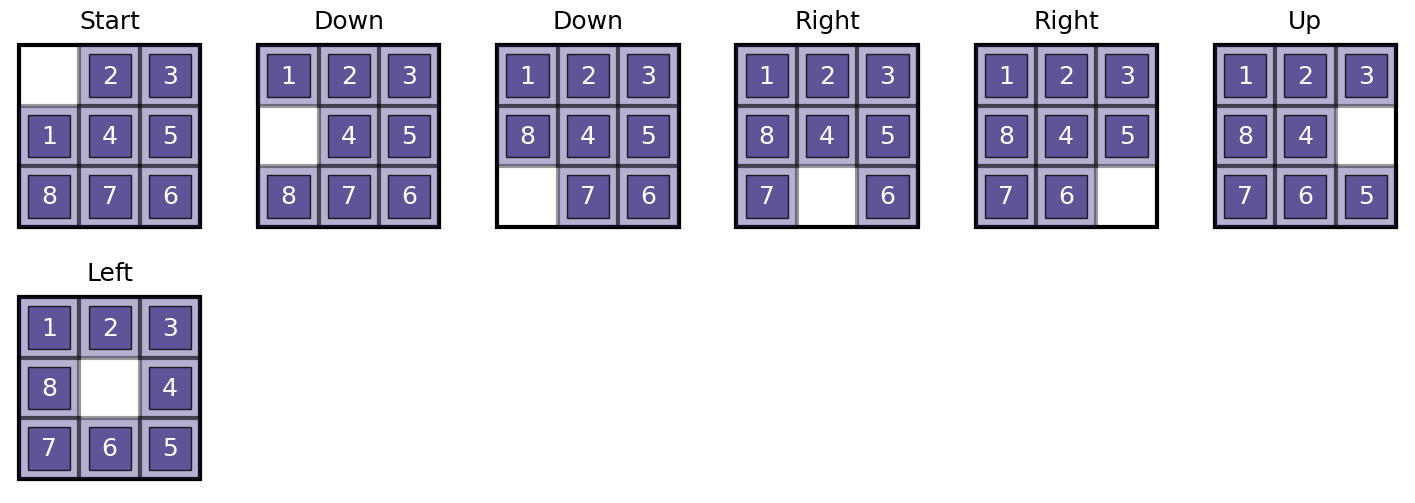

In [126]:
def show_solution(start_state, path, ncols=5, fs=18):
    if not isinstance(path, list):
        print("No solution found!")
        return

    N = len(path) + 1
    nrows = int(math.ceil(N / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(3 * ncols, 3 * nrows))

    if nrows > 1:
        start_state.plot(axes[0][0], 'Start', fs)
        for i, (state, action) in enumerate(path):
            state.plot(axes[(i + 1) // ncols][(i + 1) % ncols], action, fs)
        for i in range(N, nrows * ncols):
            axes[nrows-1][i % ncols].axis('off')
    else:
        start_state.plot(axes[0], 'Start', fs)
        for i, (state, action) in enumerate(path):
            state.plot(axes[i + 1], action, fs)
        for i in range(N, ncols):
            axes[i].axis('off')

solution_path, N = BFS(start_state, goal_state)

print(f"Number of generated nodes: {N}")
print(f"Length of solution path: {len(solution_path)}")
show_solution(start_state, solution_path, ncols=6)

### DFS

Depth-First Search (DFS) is an uninformed search algorithm used for traversing or searching a tree or graph data structure. It explores as far as possible along each branch before backtracking and exploring another branch. DFS is useful for finding a solution if it exists but may not find the optimal solution.

Advantages of DFS:

1. Memory Efficient: DFS is more memory-efficient than BFS because it only needs to store the nodes along a single branch at a time, rather than storing all nodes at a particular level.
2. Complete for Finite Spaces: DFS is complete for finite search spaces, meaning it will find a solution if one exists, given enough time and memory.
3. Good for Constrained Problems: DFS performs well in constrained problems where the solution is likely to be found along a single branch.

Disadvantages of DFS:

1. Not Optimal for Shortest Path: DFS may not find the shortest path to the goal, even if one exists, as it explores paths deeply before considering other alternatives.
2. Potential for Redundant Exploration: DFS may explore redundant paths, leading to unnecessary computations.
3. Infinite Paths: DFS may get stuck in infinite loops or paths if the search space is not finite or if there are cycles in the graph.

Steps in DFS:

1. Initialize an empty stack to store the frontier nodes.
2. Push the start node onto the stack.
3. While the stack is not empty:
    - Pop a node from the top of the stack.
    - If the popped node is the goal node, return the solution and the number of nodes generated.
    - Mark the popped node as explored.
    - Generate all successors (child nodes) of the popped node.
    - For each successor that has not been explored, push it onto the stack.
4. If the stack becomes empty and the goal node has not been found, return None, indicating no solution exists.

In [127]:
Node = namedtuple('Node', 'state parent action cost')

def solution(node):
    path = []
    while node.parent is not None:
        path = [(node.state, node.action)] + path
        node = node.parent
    return path

def DFS(start_state, goal_state):
    
    def is_cycle(node):
        state = node.state
        while node.parent is not None:
            if state == node.parent.state:
                return True
            node = node.parent
        return False

    
    frontier = Stack()
    frontier.push(Node(start_state, None, None, 0))
    
    num_generated = 0
    
    while not frontier.is_empty():
        node = frontier.pop()
                
        if node.state == goal_state: 
            return solution(node), num_generated
        
        if not is_cycle(node):
            for successor, action, step_cost in node.state.successors():
                frontier.push(Node(successor, node, action, node.cost + step_cost))
                num_generated += 1
        
    return None, num_generated

Number of generated nodes: 112
Length of solution path: 40


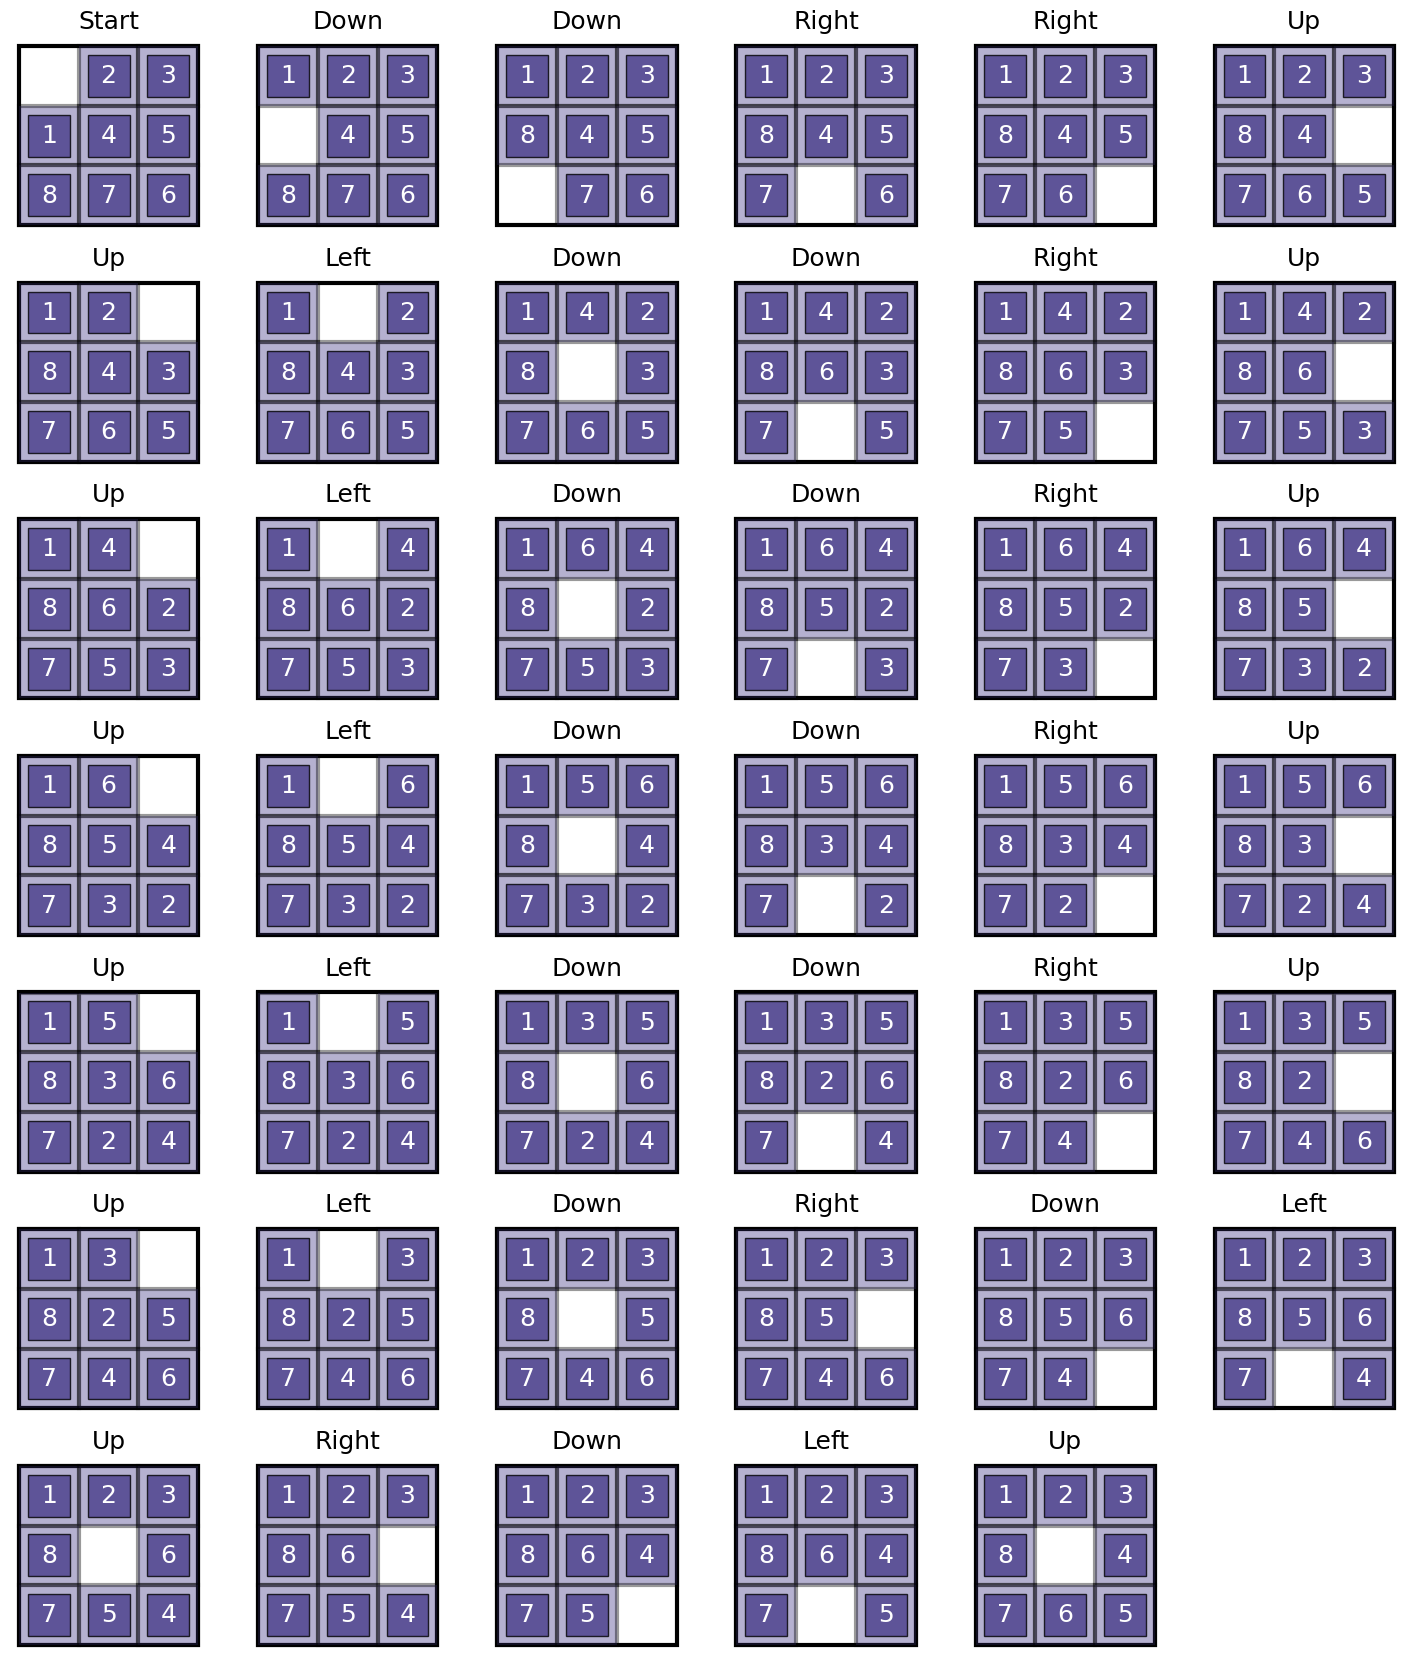

In [128]:
def show_solution(start_state, path, ncols=5, fs=18):
    if not isinstance(path, list):
        print("No solution found!")
        return

    N = len(path) + 1
    nrows = int(math.ceil(N / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(3 * ncols, 3 * nrows))

    if nrows > 1:
        start_state.plot(axes[0][0], 'Start', fs)
        for i, (state, action) in enumerate(path):
            state.plot(axes[(i + 1) // ncols][(i + 1) % ncols], action, fs)
        for i in range(N, nrows * ncols):
            axes[nrows-1][i % ncols].axis('off')
    else:
        start_state.plot(axes[0], 'Start', fs)
        for i, (state, action) in enumerate(path):
            state.plot(axes[i + 1], action, fs)
        for i in range(N, ncols):
            axes[i].axis('off')

solution_path, N = DFS(start_state, goal_state)

print(f"Number of generated nodes: {N}")
print(f"Length of solution path: {len(solution_path)}")
show_solution(start_state, solution_path, ncols=6)